<a href="https://colab.research.google.com/github/sanskarram981/forecasting_of_household_electrical_load_using_machine_learning/blob/main/Forecasting_of_future_electrical_load_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the necessary library required for implementing the project.**




In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # to split the data into two parts i.e training and test dataset
from sklearn.preprocessing import StandardScaler     # for normalization of the features
from sklearn.preprocessing import MinMaxScaler       # for scaling the features

from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix

**Connecting the jupyter notebook to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


**Dataset on which machine learning will be applied.**

In [ ]:
!ls /content/gdrive/MyDrive/8th_semester_project  




bead_size_prediction_dataset.xlsx  household_power_consumption.txt
household_dataset_description.pdf


**Loading the dataset into the pandas dataframe.**

In [ ]:
my_dataset = pd.read_csv('/content/gdrive/MyDrive/8th_semester_project/household_power_consumption.txt',sep=";",na_values=['nan','?'])
my_dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
my_dataset.shape

(2075259, 9)

In [ ]:
my_dataset.drop_duplicates(keep=False,inplace=True)


In [ ]:
my_dataset.shape

(2075259, 9)

In [ ]:
dataset = my_dataset.sample(frac =.05)

In [ ]:
dataset.shape

(103763, 9)

In [ ]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1528022,11/11/2009,20:26:00,2.528,0.068,240.83,10.4,0.0,1.0,18.0
793011,19/6/2008,10:15:00,0.234,0.114,237.85,1.0,0.0,0.0,1.0
1079781,4/1/2009,13:45:00,0.706,0.130,245.73,3.0,0.0,1.0,0.0
1150151,22/2/2009,10:35:00,0.422,0.072,242.13,1.8,0.0,0.0,0.0
1321406,21/6/2009,08:50:00,0.532,0.000,239.73,2.6,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...
42366,15/1/2007,03:30:00,0.214,0.000,244.86,0.8,0.0,0.0,0.0
190706,28/4/2007,03:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781604,6/5/2010,22:48:00,0.882,0.152,238.97,3.8,0.0,0.0,1.0
1893606,23/7/2010,17:30:00,1.060,0.432,238.69,4.8,0.0,1.0,12.0


**Exploratory Data Analysis**





In [ ]:
dataset = dataset.drop(["Date","Time"], inplace = False,axis=1)
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1528022,2.528,0.068,240.83,10.4,0.0,1.0,18.0
793011,0.234,0.114,237.85,1.0,0.0,0.0,1.0
1079781,0.706,0.130,245.73,3.0,0.0,1.0,0.0
1150151,0.422,0.072,242.13,1.8,0.0,0.0,0.0
1321406,0.532,0.000,239.73,2.6,0.0,0.0,6.0
...,...,...,...,...,...,...,...
42366,0.214,0.000,244.86,0.8,0.0,0.0,0.0
190706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781604,0.882,0.152,238.97,3.8,0.0,0.0,1.0
1893606,1.060,0.432,238.69,4.8,0.0,1.0,12.0


In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1528022,2.528,0.068,240.83,10.4,0.0,1.0,18.0
793011,0.234,0.114,237.85,1.0,0.0,0.0,1.0
1079781,0.706,0.130,245.73,3.0,0.0,1.0,0.0
1150151,0.422,0.072,242.13,1.8,0.0,0.0,0.0
1321406,0.532,0.000,239.73,2.6,0.0,0.0,6.0


In [ ]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
42366,0.214,0.000,244.86,0.8,0.0,0.0,0.0
190706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781604,0.882,0.152,238.97,3.8,0.0,0.0,1.0
1893606,1.060,0.432,238.69,4.8,0.0,1.0,12.0
32540,1.154,0.132,239.10,4.8,0.0,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103763 entries, 1528022 to 32540
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    102434 non-null  float64
 1   Global_reactive_power  102434 non-null  float64
 2   Voltage                102434 non-null  float64
 3   Global_intensity       102434 non-null  float64
 4   Sub_metering_1         102434 non-null  float64
 5   Sub_metering_2         102434 non-null  float64
 6   Sub_metering_3         102434 non-null  float64
dtypes: float64(7)
memory usage: 6.3 MB


In [ ]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,102434.000000,102434.000000,102434.000000,102434.000000,102434.000000,102434.000000,102434.000000
mean,1.085795,0.123507,240.858032,4.603536,1.137532,1.291388,6.399477
std,1.054054,0.112951,3.222593,4.430186,6.219469,5.833959,8.418879
min,0.076000,0.000000,223.990000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,239.020000,1.400000,0.000000,0.000000,0.000000
50%,0.592000,0.100000,241.020000,2.600000,0.000000,0.000000,1.000000
75%,1.522000,0.194000,242.890000,6.400000,0.000000,1.000000,17.000000
max,9.694000,1.364000,253.520000,42.800000,81.000000,75.000000,31.000000


In [ ]:
dataset.shape

(103763, 7)

In [ ]:
dataset.isnull().sum()


Global_active_power      1329
Global_reactive_power    1329
Voltage                  1329
Global_intensity         1329
Sub_metering_1           1329
Sub_metering_2           1329
Sub_metering_3           1329
dtype: int64

In [ ]:
for j in range(0,7):        
        dataset.iloc[:,j]=dataset.iloc[:,j].fillna(dataset.iloc[:,j].mean())


In [ ]:
dataset.shape

(103763, 7)

In [ ]:
dataset.isnull().sum()


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

**Data visulization**

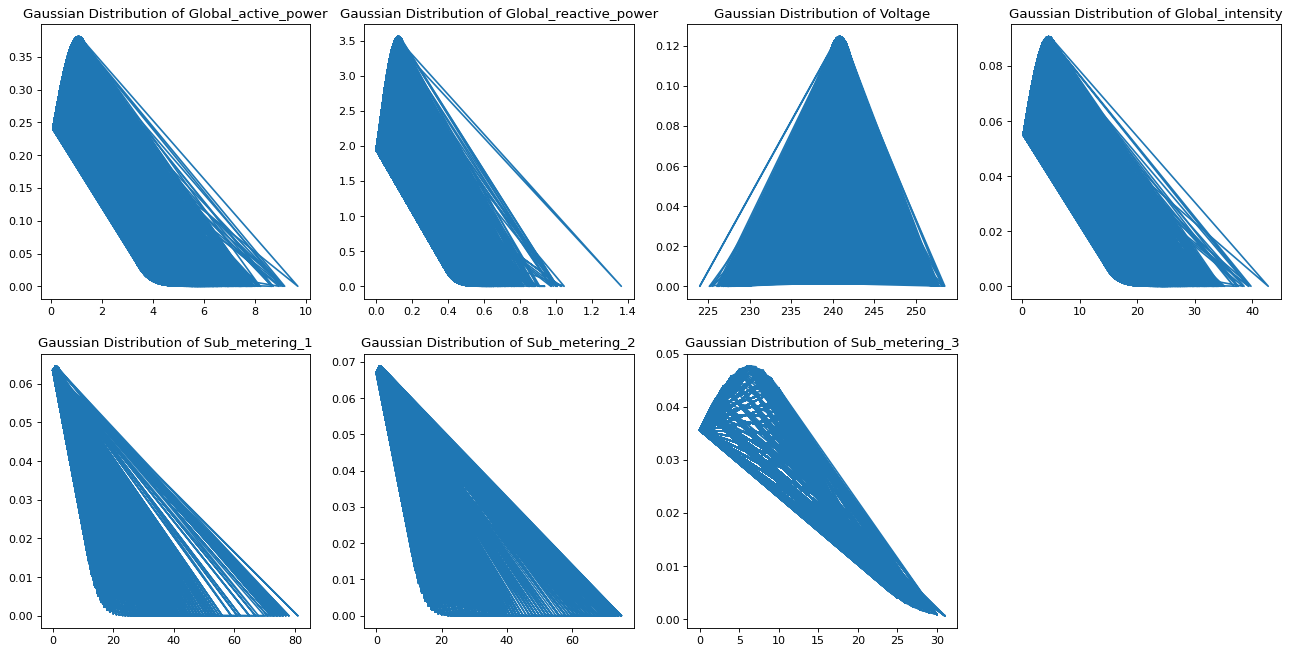

In [ ]:
from scipy.stats import norm
import statistics

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(20,10),dpi=80)

x_axis = dataset['Global_active_power'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,1)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Global_active_power")

x_axis = dataset['Global_reactive_power'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,2)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Global_reactive_power")

x_axis = dataset['Voltage'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,3)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Voltage")

x_axis = dataset['Global_intensity'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,4)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Global_intensity")

x_axis = dataset['Sub_metering_1'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,5)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Sub_metering_1")

x_axis = dataset['Sub_metering_2'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,6)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Sub_metering_2")

x_axis = dataset['Sub_metering_3'].to_numpy()#[:1037630]
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.subplot(2,4,7)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title("Gaussian Distribution of Sub_metering_3")

plt.show()


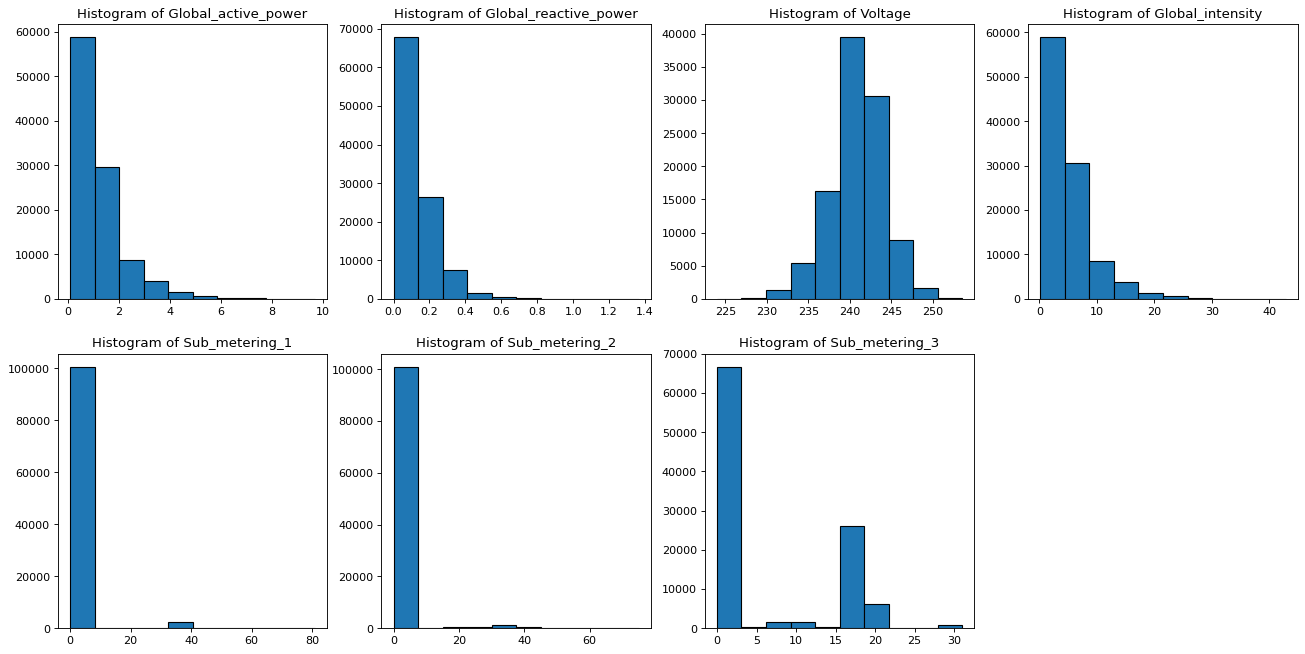

In [ ]:
plt.figure(figsize=(20,10), dpi=80)

plt.subplot(2,4,1)
x = dataset['Global_active_power'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Global_active_power")

plt.subplot(2,4,2)
x = dataset['Global_reactive_power'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Global_reactive_power")

plt.subplot(2,4,3)
x = dataset['Voltage'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Voltage")

plt.subplot(2,4,4)
x = dataset['Global_intensity'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Global_intensity")

plt.subplot(2,4,5)
x = dataset['Sub_metering_1'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Sub_metering_1")

plt.subplot(2,4,6)
x = dataset['Sub_metering_2'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Sub_metering_2")

plt.subplot(2,4,7)
x = dataset['Sub_metering_3'].to_numpy()
plt.hist(x,edgecolor='black')
plt.title("Histogram of Sub_metering_3")

plt.show()

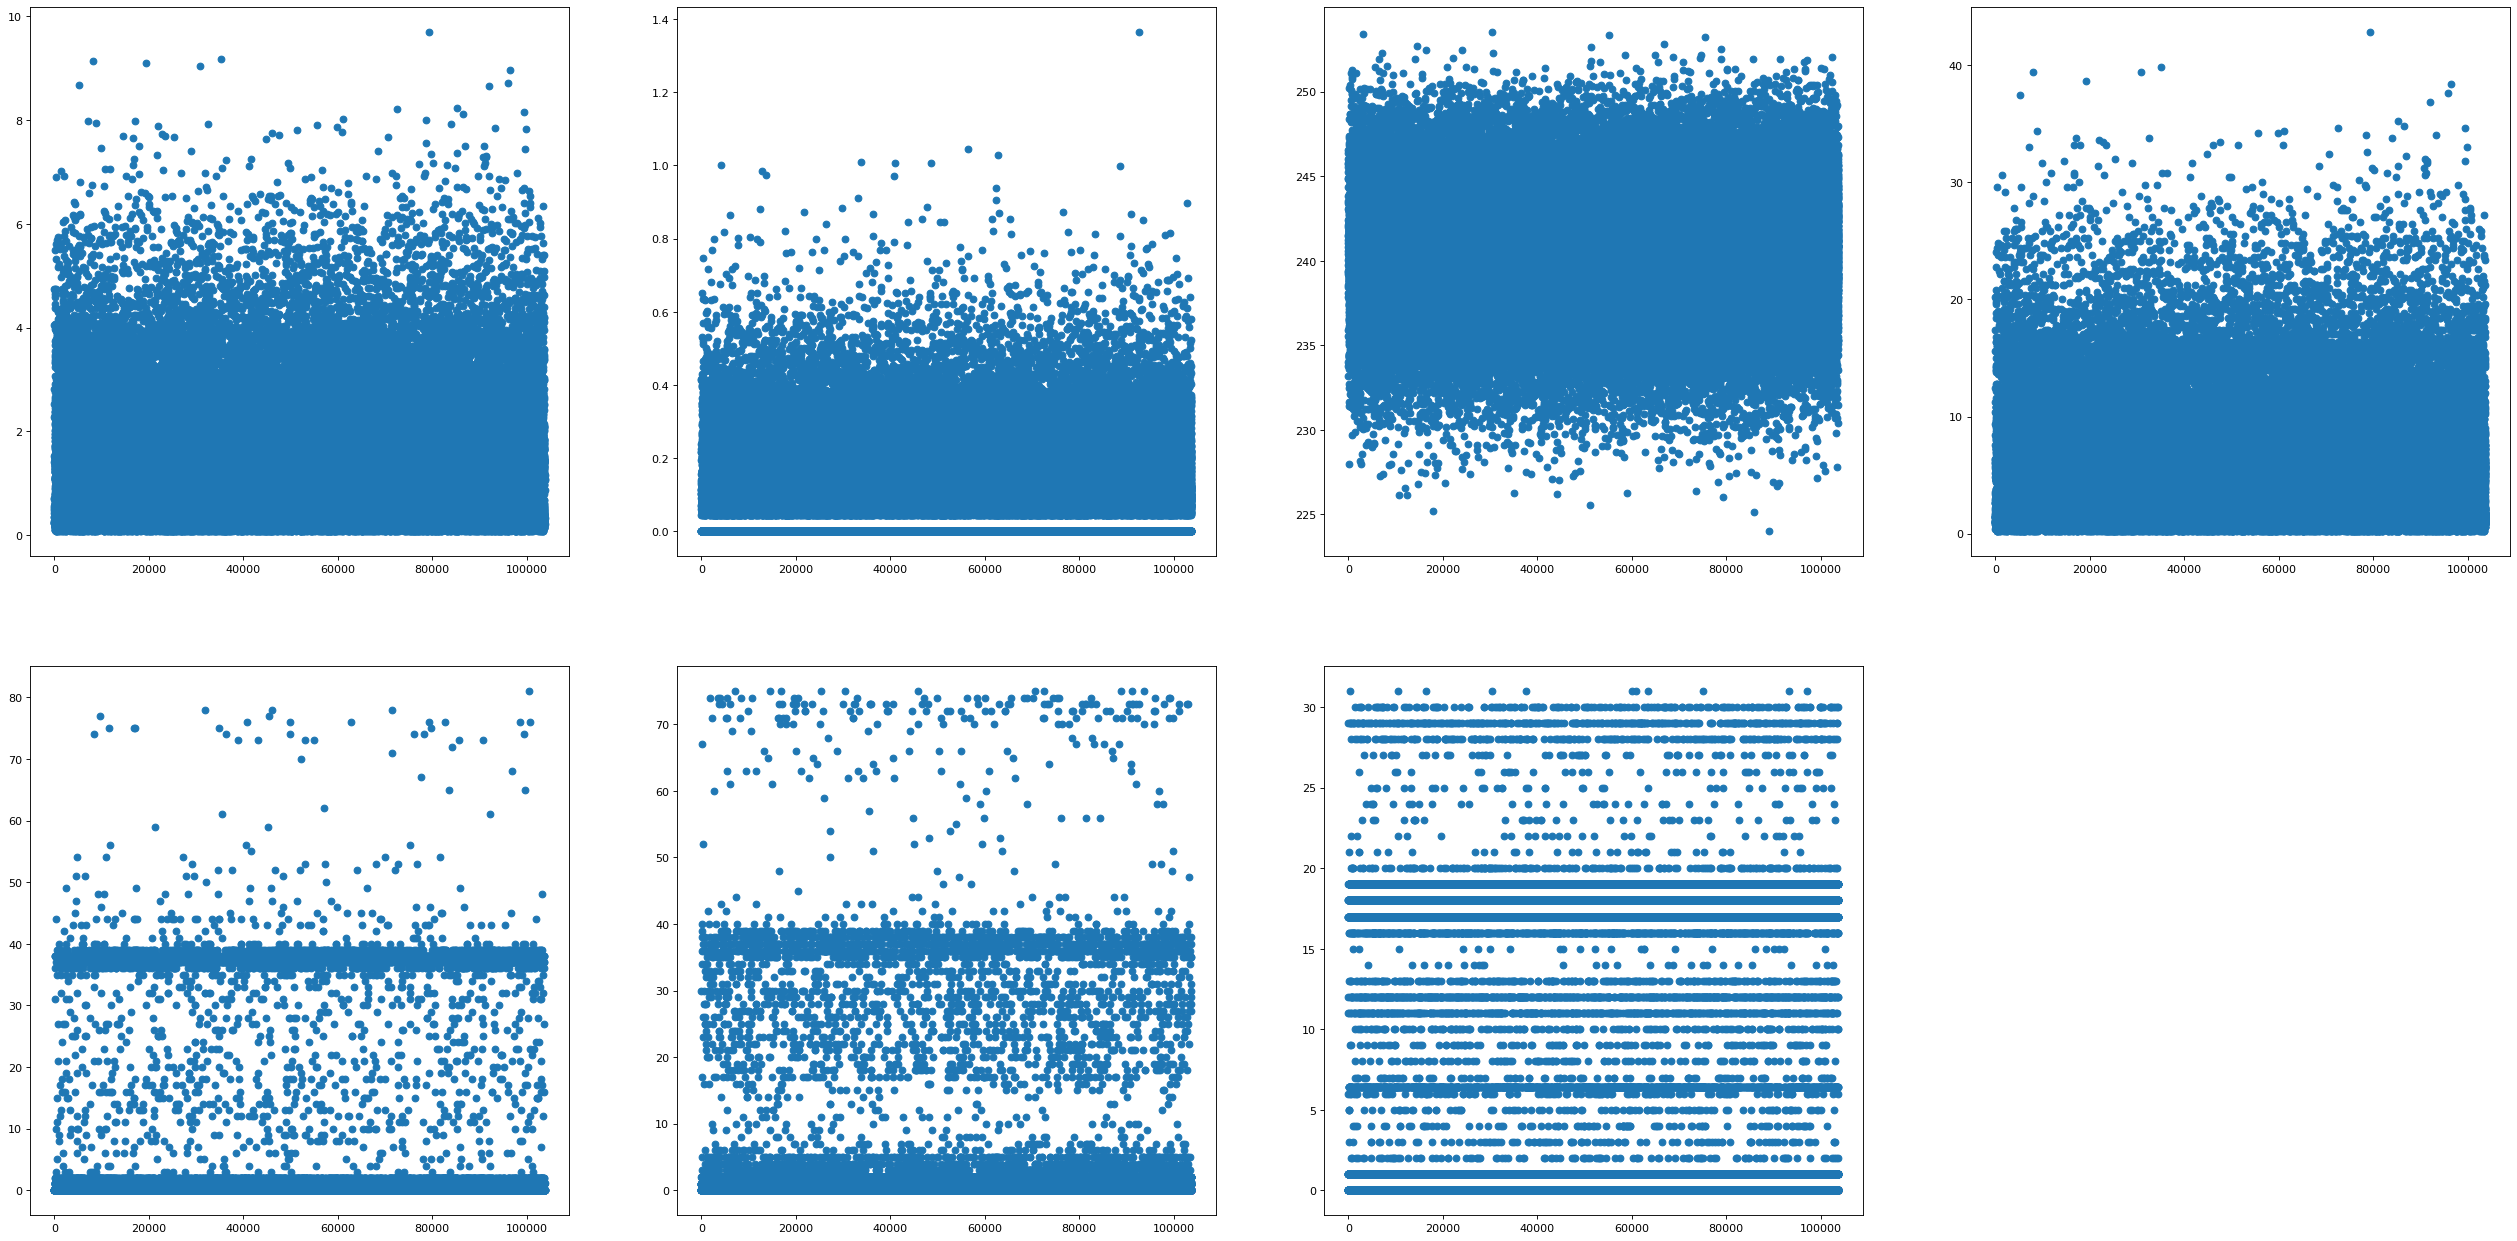

In [ ]:
plt.figure(figsize=(40,20), dpi=80)


x = np.arange(1,103764)
y = dataset['Global_active_power'].to_numpy()
plt.subplot(2,4,1)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Global_reactive_power'].to_numpy()
plt.subplot(2,4,2)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Voltage'].to_numpy()
plt.subplot(2,4,3)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Global_intensity'].to_numpy()
plt.subplot(2,4,4)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Sub_metering_1'].to_numpy()
plt.subplot(2,4,5)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Sub_metering_2'].to_numpy()
plt.subplot(2,4,6)
plt.scatter(x, y)

x = np.arange(1,103764)
y = dataset['Sub_metering_3'].to_numpy()
plt.subplot(2,4,7)
plt.scatter(x, y)

plt.show()

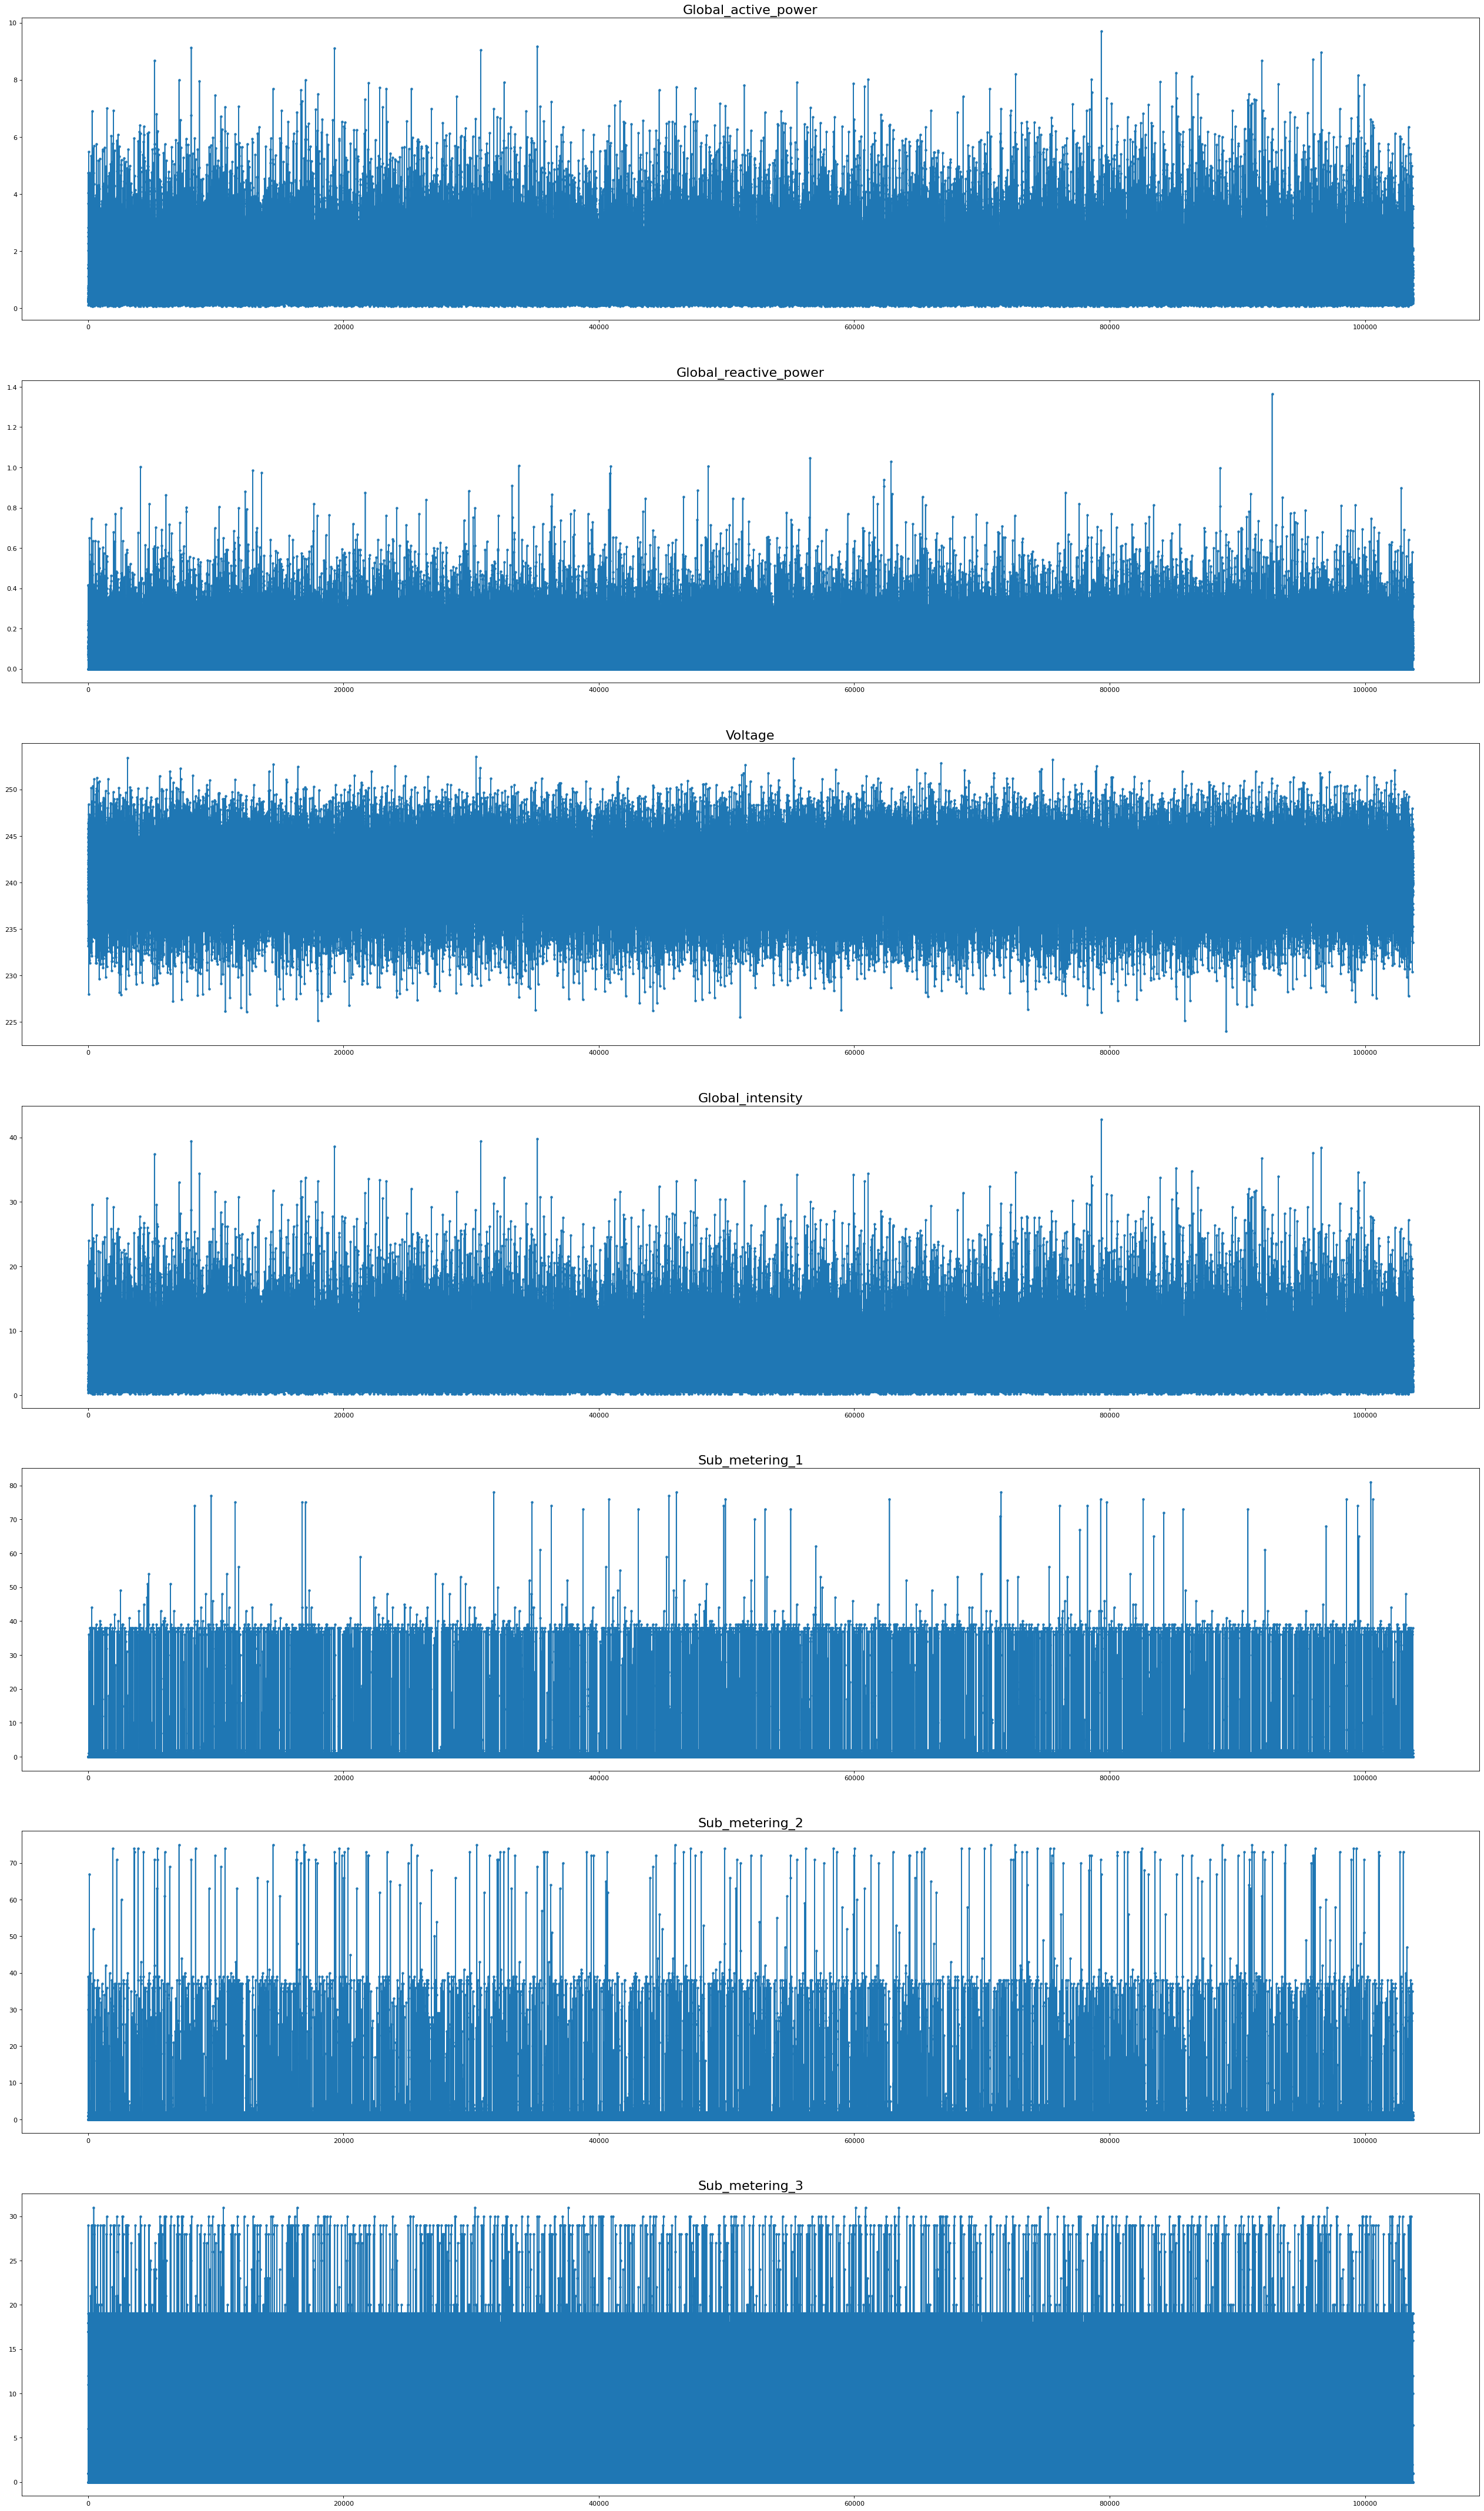

In [ ]:
plt.figure(figsize=(40,80), dpi=80)

ypoints = dataset['Global_active_power'].to_numpy()
plt.subplot(8,1,1)
plt.plot(ypoints, marker = '.')
plt.title('Global_active_power',fontsize=20)

ypoints = dataset['Global_reactive_power'].to_numpy()
plt.subplot(8,1,2)
plt.plot(ypoints, marker = '.')
plt.title('Global_reactive_power',fontsize=20)

ypoints = dataset['Voltage'].to_numpy()
plt.subplot(8,1,3)
plt.plot(ypoints, marker = '.')
plt.title('Voltage',fontsize=20)

ypoints = dataset['Global_intensity'].to_numpy()
plt.subplot(8,1,4)
plt.plot(ypoints, marker = '.')
plt.title('Global_intensity',fontsize=20)

ypoints = dataset['Sub_metering_1'].to_numpy()
plt.subplot(8,1,5)
plt.plot(ypoints, marker = '.')
plt.title('Sub_metering_1',fontsize=20)


ypoints = dataset['Sub_metering_2'].to_numpy()
plt.subplot(8,1,6)
plt.plot(ypoints, marker = '.')
plt.title('Sub_metering_2',fontsize=20)

ypoints = dataset['Sub_metering_3'].to_numpy()
plt.subplot(8,1,7)
plt.plot(ypoints, marker = '.')
plt.title('Sub_metering_3',fontsize=20)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

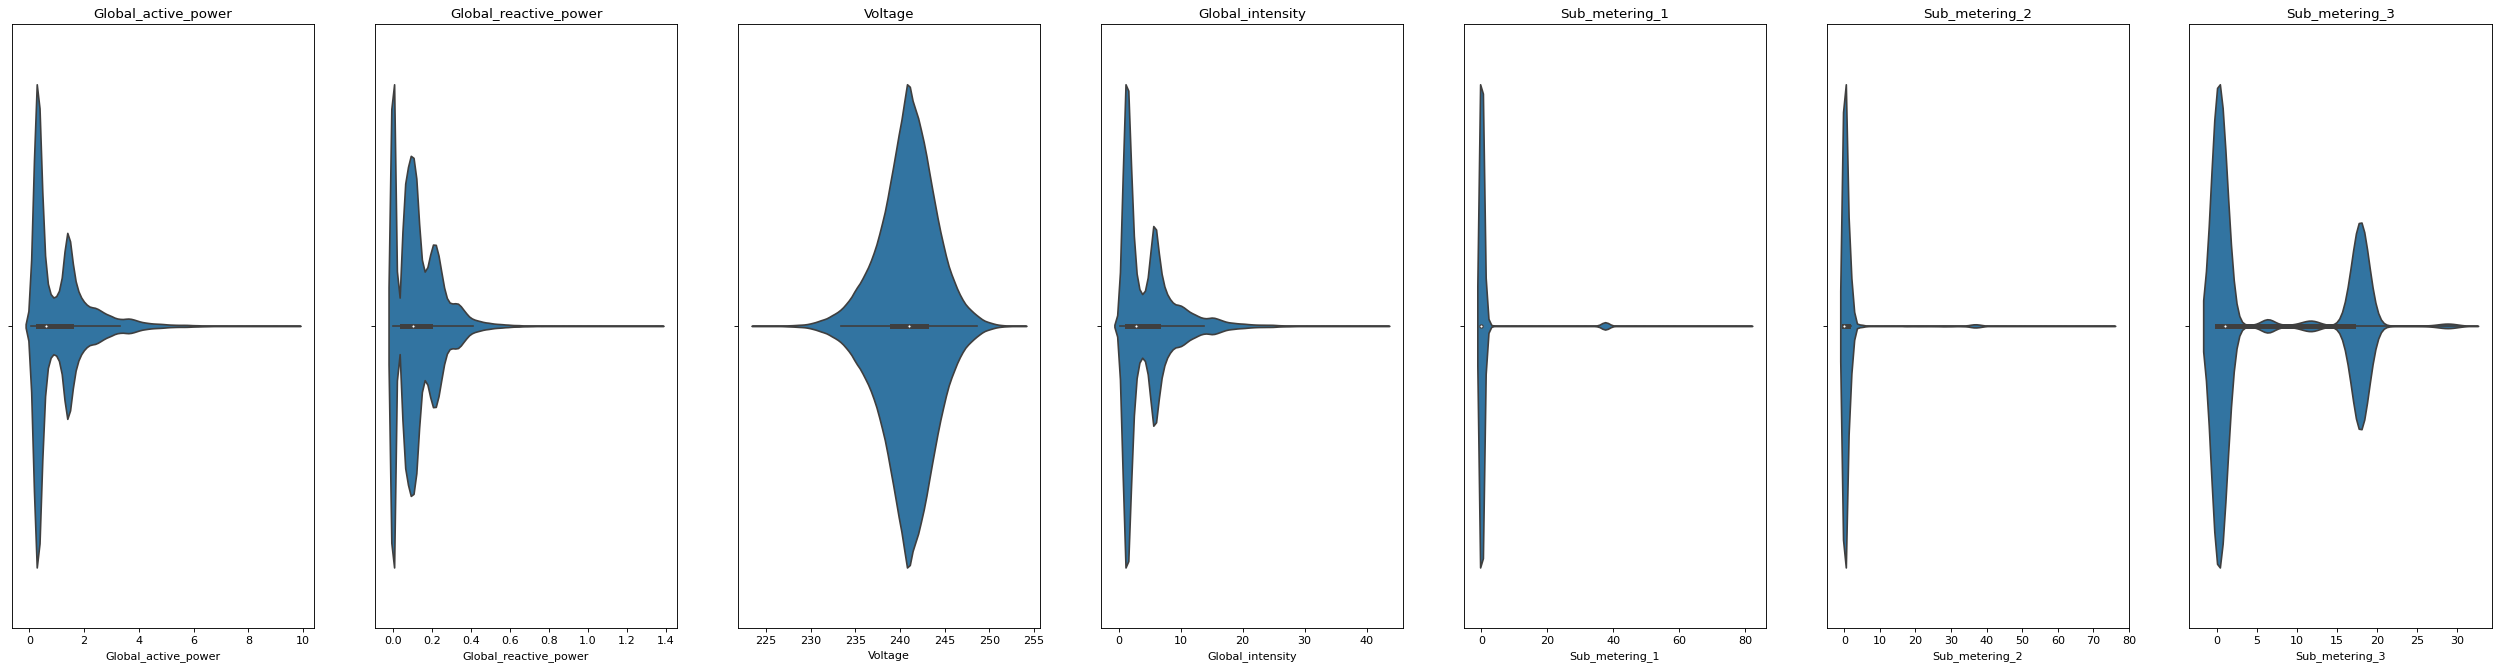

In [ ]:
import seaborn as sns
import pandas as pd
  
plt.figure(figsize=(40,10), dpi=80)

plt.subplot(1,7,1)
sns.violinplot(dataset["Global_active_power"])
plt.title("Global_active_power")

plt.subplot(1,7,2)
sns.violinplot(dataset["Global_reactive_power"])
plt.title("Global_reactive_power")

plt.subplot(1,7,3)
sns.violinplot(dataset["Voltage"])
plt.title("Voltage")

plt.subplot(1,7,4)
sns.violinplot(dataset["Global_intensity"])
plt.title("Global_intensity")

plt.subplot(1,7,5)
sns.violinplot(dataset["Sub_metering_1"])
plt.title("Sub_metering_1")

plt.subplot(1,7,6)
sns.violinplot(dataset["Sub_metering_2"])
plt.title("Sub_metering_2")

plt.subplot(1,7,7)
sns.violinplot(dataset["Sub_metering_3"])
plt.title("Sub_metering_3")
  
plt.show()

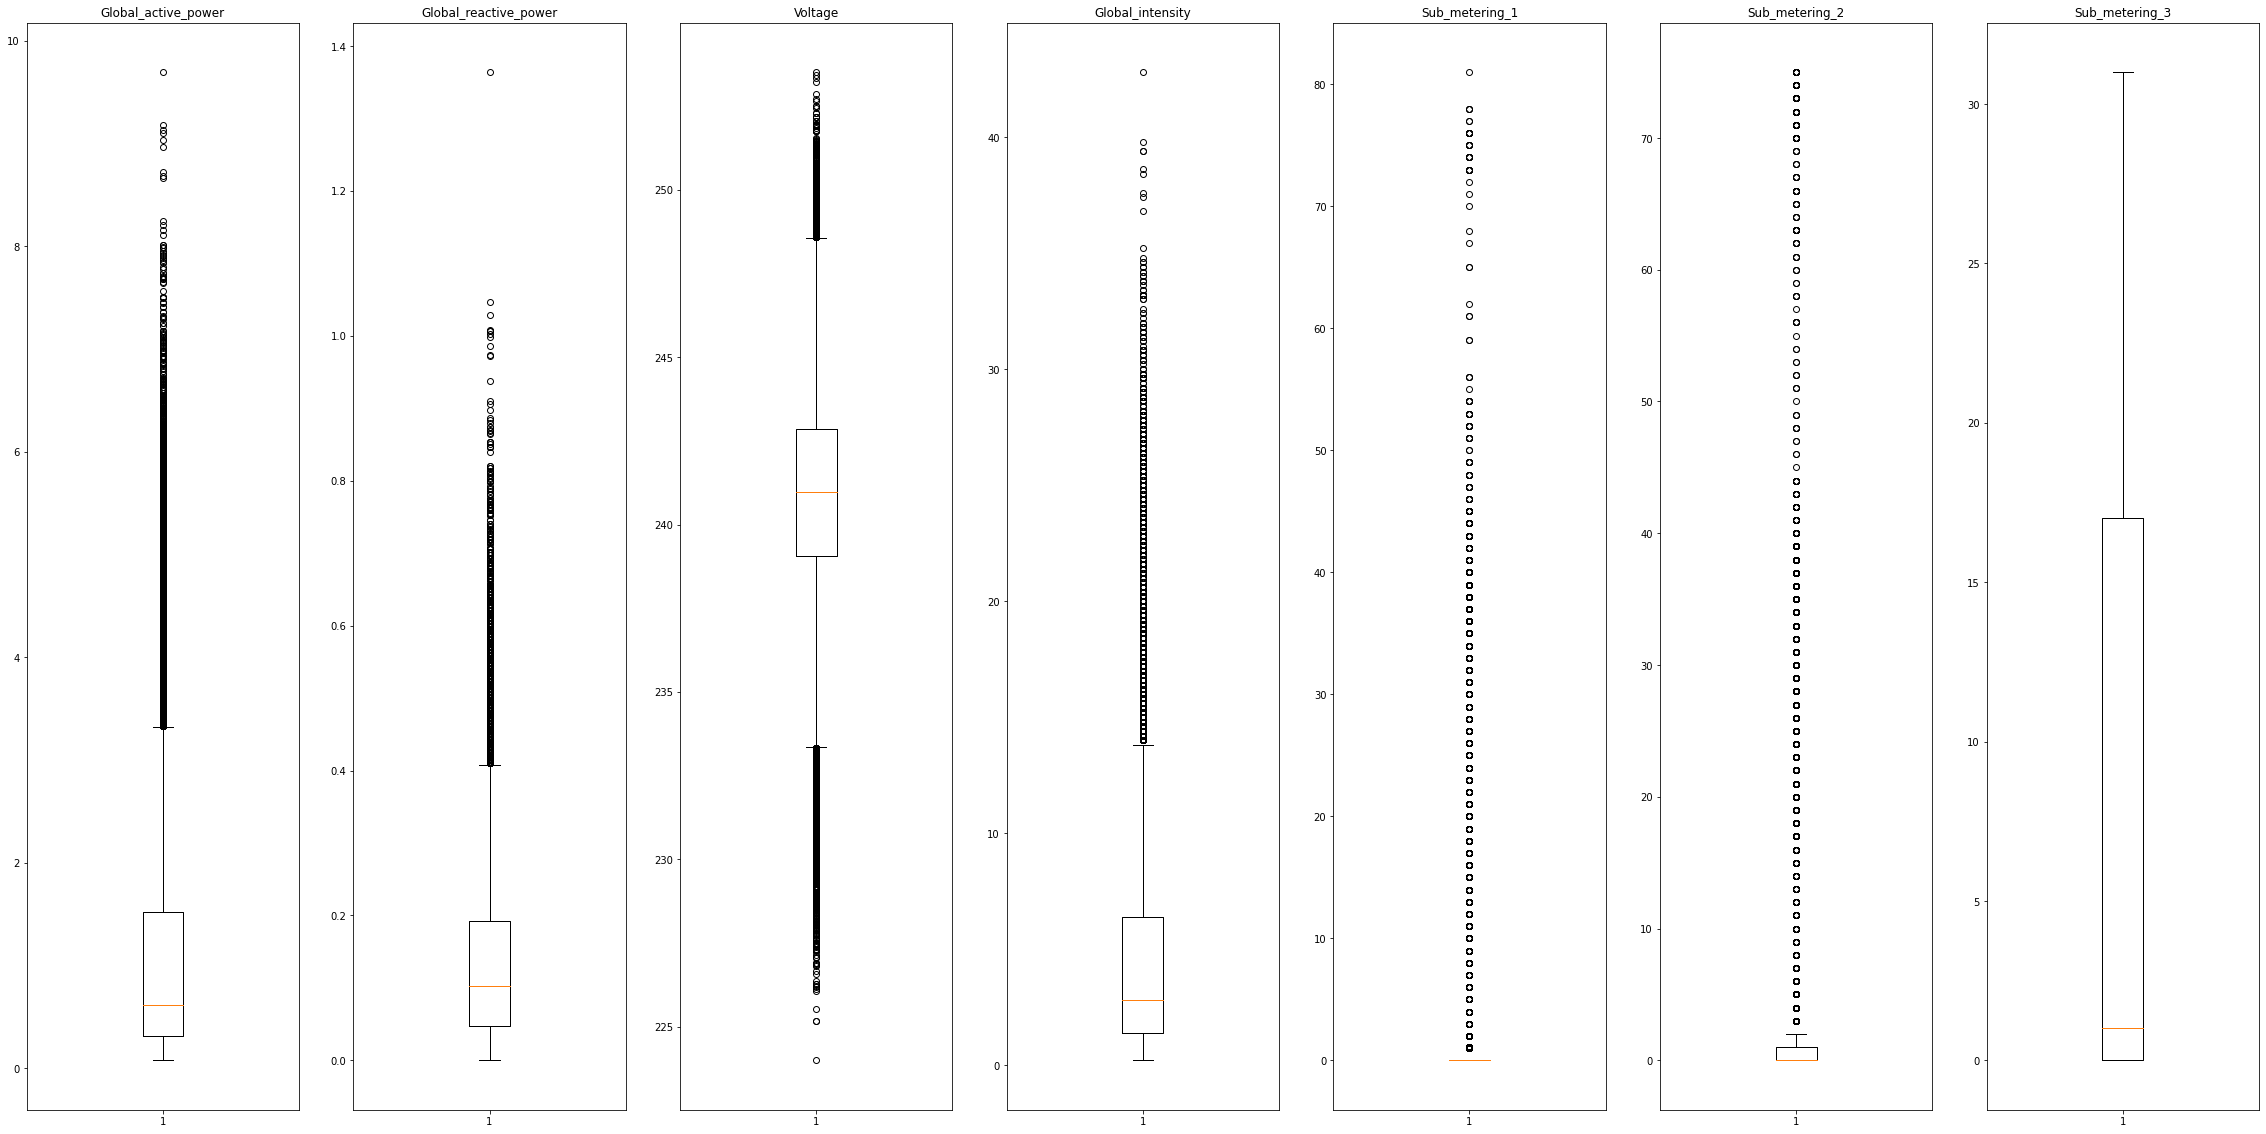

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(40,20))
np.random.seed(10)

data = dataset['Global_active_power'].to_numpy()
plt.subplot(1,7,1)
plt.boxplot(data)
plt.title('Global_active_power')
 
data = dataset['Global_reactive_power'].to_numpy()
plt.subplot(1,7,2)
plt.boxplot(data)
plt.title('Global_reactive_power')

data = dataset['Voltage'].to_numpy()
plt.subplot(1,7,3)
plt.boxplot(data)
plt.title('Voltage')

data = dataset['Global_intensity'].to_numpy()
plt.subplot(1,7,4)
plt.boxplot(data)
plt.title('Global_intensity')

data = dataset['Sub_metering_1'].to_numpy()
plt.subplot(1,7,5)
plt.boxplot(data)
plt.title('Sub_metering_1')

data = dataset['Sub_metering_2'].to_numpy()
plt.subplot(1,7,6)
plt.boxplot(data)
plt.title('Sub_metering_2')

data = dataset['Sub_metering_3'].to_numpy()
plt.subplot(1,7,7)
plt.boxplot(data)
plt.title('Sub_metering_3')

plt.show()

**Splitting dataset into training dataset and test dataset respectively.**

In [ ]:
from sklearn.model_selection import train_test_split

training_dataset, testing_dataset = train_test_split(dataset, test_size=0.1, random_state=25)


In [ ]:
dataset.shape


(103763, 7)

In [ ]:
training_dataset.shape

(93386, 7)

In [ ]:
testing_dataset.shape

(10377, 7)

In [ ]:
dataset.shape[0] == training_dataset.shape[0]+testing_dataset.shape[0]


True

**Creation of the target variable in the training dataset with the help of available features in the dataframe**

In [ ]:
training_dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1440973,1.348,0.084,241.19,5.6,1.0,0.0,18.0
401411,0.286,0.212,237.63,1.4,0.0,1.0,0.0
696281,0.268,0.000,243.93,1.0,0.0,0.0,1.0
1085652,0.378,0.116,249.62,1.6,0.0,0.0,0.0
474897,3.536,0.496,236.83,15.2,0.0,0.0,17.0
...,...,...,...,...,...,...,...
1677877,6.546,0.092,234.48,27.8,0.0,73.0,17.0
1114970,0.374,0.156,248.47,1.6,0.0,0.0,0.0
873524,0.174,0.146,237.91,0.8,0.0,0.0,0.0
1805780,0.924,0.404,238.19,4.2,0.0,0.0,1.0


In [ ]:
training_dataset["active_energy_per_minute_in_Wh"] = (training_dataset['Global_active_power']*1000)/60 - training_dataset['Sub_metering_1'] - training_dataset['Sub_metering_2'] - training_dataset['Sub_metering_3']


In [ ]:
training_dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh
1440973,1.348,0.084,241.19,5.6,1.0,0.0,18.0,3.466667
401411,0.286,0.212,237.63,1.4,0.0,1.0,0.0,3.766667
696281,0.268,0.000,243.93,1.0,0.0,0.0,1.0,3.466667
1085652,0.378,0.116,249.62,1.6,0.0,0.0,0.0,6.300000
474897,3.536,0.496,236.83,15.2,0.0,0.0,17.0,41.933333
...,...,...,...,...,...,...,...,...
1677877,6.546,0.092,234.48,27.8,0.0,73.0,17.0,19.100000
1114970,0.374,0.156,248.47,1.6,0.0,0.0,0.0,6.233333
873524,0.174,0.146,237.91,0.8,0.0,0.0,0.0,2.900000
1805780,0.924,0.404,238.19,4.2,0.0,0.0,1.0,14.400000


**Creation of the target variable in the testing dataset with the help of available features in the dataframe.**

In [ ]:
testing_dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
696294,0.266,0.000,243.85,1.0,0.0,0.0,1.0
1953000,0.630,0.000,246.69,2.6,0.0,0.0,1.0
1787586,1.554,0.204,245.88,6.2,0.0,0.0,19.0
1546288,1.980,0.000,240.85,8.2,0.0,0.0,18.0
1722499,2.704,0.000,238.62,11.2,0.0,0.0,18.0
...,...,...,...,...,...,...,...
1671759,0.344,0.070,247.68,1.4,0.0,0.0,1.0
1401804,0.156,0.000,243.91,0.6,0.0,0.0,1.0
1977546,0.236,0.088,244.35,1.0,0.0,2.0,0.0
1284552,0.394,0.156,228.47,1.8,0.0,2.0,1.0


In [ ]:
testing_dataset["active_energy_per_minute_in_Wh"] = (testing_dataset['Global_active_power']*1000)/60 - testing_dataset['Sub_metering_1'] - testing_dataset['Sub_metering_2'] - testing_dataset['Sub_metering_3']


In [ ]:
testing_dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh
696294,0.266,0.000,243.85,1.0,0.0,0.0,1.0,3.433333
1953000,0.630,0.000,246.69,2.6,0.0,0.0,1.0,9.500000
1787586,1.554,0.204,245.88,6.2,0.0,0.0,19.0,6.900000
1546288,1.980,0.000,240.85,8.2,0.0,0.0,18.0,15.000000
1722499,2.704,0.000,238.62,11.2,0.0,0.0,18.0,27.066667
...,...,...,...,...,...,...,...,...
1671759,0.344,0.070,247.68,1.4,0.0,0.0,1.0,4.733333
1401804,0.156,0.000,243.91,0.6,0.0,0.0,1.0,1.600000
1977546,0.236,0.088,244.35,1.0,0.0,2.0,0.0,1.933333
1284552,0.394,0.156,228.47,1.8,0.0,2.0,1.0,3.566667


**Performing segmentation using K-means clustering algorithm.**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
clustering_dataset = training_dataset.copy()
clustering_dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh
1440973,1.348,0.084,241.19,5.6,1.0,0.0,18.0,3.466667
401411,0.286,0.212,237.63,1.4,0.0,1.0,0.0,3.766667
696281,0.268,0.000,243.93,1.0,0.0,0.0,1.0,3.466667
1085652,0.378,0.116,249.62,1.6,0.0,0.0,0.0,6.300000
474897,3.536,0.496,236.83,15.2,0.0,0.0,17.0,41.933333


In [ ]:
clustering_dataset



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh
1440973,1.348,0.084,241.19,5.6,1.0,0.0,18.0,3.466667
401411,0.286,0.212,237.63,1.4,0.0,1.0,0.0,3.766667
696281,0.268,0.000,243.93,1.0,0.0,0.0,1.0,3.466667
1085652,0.378,0.116,249.62,1.6,0.0,0.0,0.0,6.300000
474897,3.536,0.496,236.83,15.2,0.0,0.0,17.0,41.933333
...,...,...,...,...,...,...,...,...
1677877,6.546,0.092,234.48,27.8,0.0,73.0,17.0,19.100000
1114970,0.374,0.156,248.47,1.6,0.0,0.0,0.0,6.233333
873524,0.174,0.146,237.91,0.8,0.0,0.0,0.0,2.900000
1805780,0.924,0.404,238.19,4.2,0.0,0.0,1.0,14.400000


In [ ]:
sc = MinMaxScaler()

clustering_dataset['Global_active_power'] = sc.fit_transform(clustering_dataset['Global_active_power'].to_numpy().reshape(-1,1))

clustering_dataset['Global_reactive_power'] = sc.fit_transform(clustering_dataset['Global_reactive_power'].to_numpy().reshape(-1,1))

clustering_dataset['Voltage'] = sc.fit_transform(clustering_dataset['Voltage'].to_numpy().reshape(-1,1))

clustering_dataset['Global_intensity'] = sc.fit_transform(clustering_dataset['Global_intensity'].to_numpy().reshape(-1,1))

clustering_dataset['Sub_metering_1'] = sc.fit_transform(clustering_dataset['Sub_metering_1'].to_numpy().reshape(-1,1))

clustering_dataset['Sub_metering_2'] = sc.fit_transform(clustering_dataset['Sub_metering_2'].to_numpy().reshape(-1,1))

clustering_dataset['Sub_metering_3'] = sc.fit_transform(clustering_dataset['Sub_metering_3'].to_numpy().reshape(-1,1))

In [ ]:
clustering_dataset


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh
1440973,0.132252,0.080306,0.582459,0.126761,0.012346,0.000000,0.580645,3.466667
401411,0.021834,0.202677,0.461903,0.028169,0.000000,0.013333,0.000000,3.766667
696281,0.019963,0.000000,0.675246,0.018779,0.000000,0.000000,0.032258,3.466667
1085652,0.031399,0.110899,0.867931,0.032864,0.000000,0.000000,0.000000,6.300000
474897,0.359742,0.474187,0.434812,0.352113,0.000000,0.000000,0.548387,41.933333
...,...,...,...,...,...,...,...,...
1677877,0.672697,0.087954,0.355232,0.647887,0.000000,0.973333,0.548387,19.100000
1114970,0.030984,0.149140,0.828987,0.032864,0.000000,0.000000,0.000000,6.233333
873524,0.010189,0.139579,0.471385,0.014085,0.000000,0.000000,0.000000,2.900000
1805780,0.088168,0.386233,0.480867,0.093897,0.000000,0.000000,0.032258,14.400000


In [ ]:
k_rng = range(1,10)
sse = []

for k in k_rng:
  KM = KMeans(n_clusters=k)
  KM.fit(clustering_dataset[['Global_active_power', 'Global_reactive_power', 'Voltage',
                             'Global_intensity']])
  sse.append(KM.inertia_)

In [ ]:
sse

[4282.613148306373,
 2705.5459098482434,
 2184.587990962694,
 1777.7238689964763,
 1529.0325298003072,
 1353.90815717943,
 1206.1778920002967,
 1084.466999094875,
 1003.7456194574811]

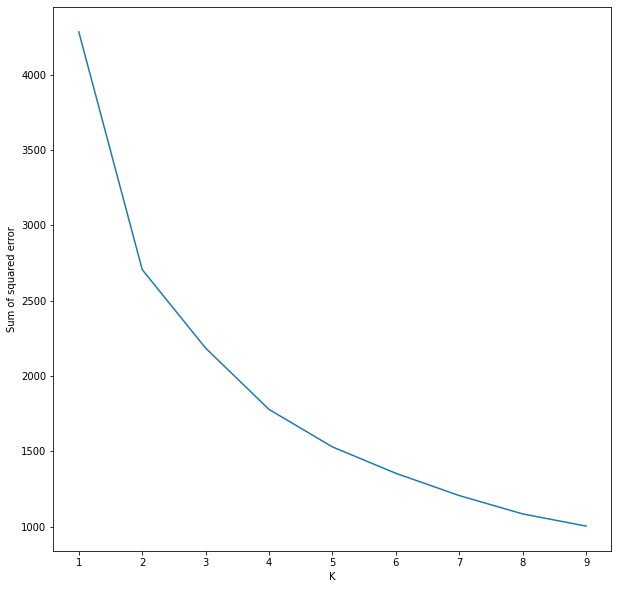

In [ ]:

plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(clustering_dataset[['Global_active_power', 'Global_reactive_power', 'Voltage',
                                               'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
                                               'Sub_metering_3']])
y_predicted

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
clustering_dataset['cluster'] = y_predicted
clustering_dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_per_minute_in_Wh,cluster
1440973,0.132252,0.080306,0.582459,0.126761,0.012346,0.000000,0.580645,3.466667,0
401411,0.021834,0.202677,0.461903,0.028169,0.000000,0.013333,0.000000,3.766667,1
696281,0.019963,0.000000,0.675246,0.018779,0.000000,0.000000,0.032258,3.466667,1
1085652,0.031399,0.110899,0.867931,0.032864,0.000000,0.000000,0.000000,6.300000,1
474897,0.359742,0.474187,0.434812,0.352113,0.000000,0.000000,0.548387,41.933333,0
...,...,...,...,...,...,...,...,...,...
1677877,0.672697,0.087954,0.355232,0.647887,0.000000,0.973333,0.548387,19.100000,2
1114970,0.030984,0.149140,0.828987,0.032864,0.000000,0.000000,0.000000,6.233333,1
873524,0.010189,0.139579,0.471385,0.014085,0.000000,0.000000,0.000000,2.900000,1
1805780,0.088168,0.386233,0.480867,0.093897,0.000000,0.000000,0.032258,14.400000,1


In [ ]:
km.cluster_centers_

array([[0.17662204, 0.12524244, 0.53842678, 0.16912945, 0.00237614,
        0.00745483, 0.57747216],
       [0.04897228, 0.10901652, 0.59579662, 0.05104554, 0.00221747,
        0.00905642, 0.01719687],
       [0.42633057, 0.19967411, 0.43704665, 0.41129531, 0.2663664 ,
        0.20273521, 0.40370177]])

In [ ]:
df1 = clustering_dataset[clustering_dataset.cluster == 0]
df2 = clustering_dataset[clustering_dataset.cluster == 1]
df3 = clustering_dataset[clustering_dataset.cluster == 2]


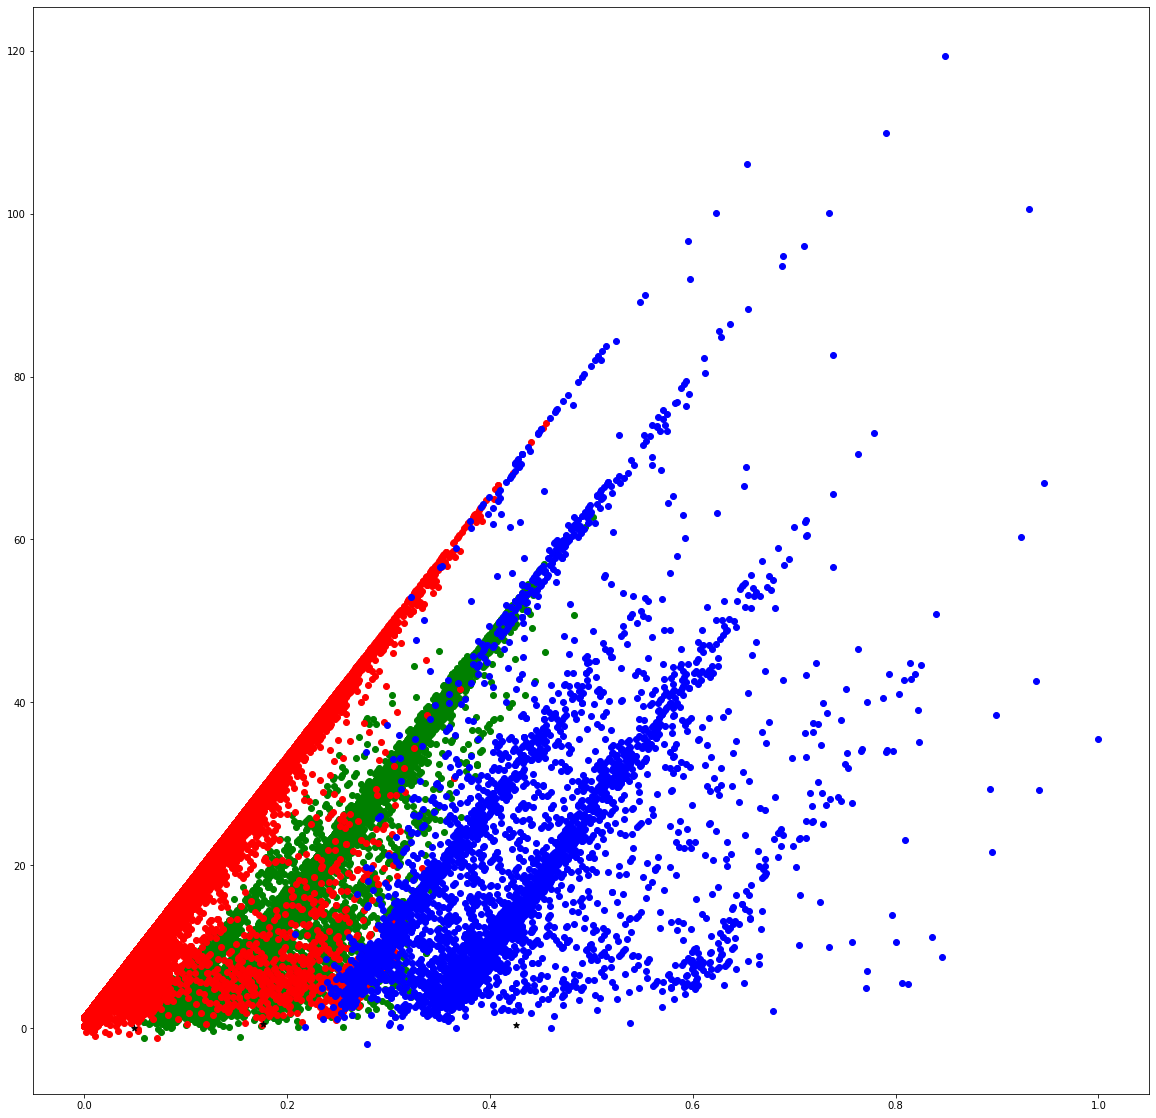

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(df1.Global_active_power,df1.active_energy_per_minute_in_Wh,color='green')
plt.scatter(df2.Global_active_power,df2.active_energy_per_minute_in_Wh,color='red')
plt.scatter(df3.Global_active_power,df3.active_energy_per_minute_in_Wh,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,6],color='black',marker='*',label='centroid')
plt.show()

**Scaling/ Normalizing the features in the training dataset**





In [ ]:
X_train = training_dataset[training_dataset.columns.tolist()[:-1]].copy()
X_train


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1440973,1.348,0.084,241.19,5.6,1.0,0.0,18.0
401411,0.286,0.212,237.63,1.4,0.0,1.0,0.0
696281,0.268,0.000,243.93,1.0,0.0,0.0,1.0
1085652,0.378,0.116,249.62,1.6,0.0,0.0,0.0
474897,3.536,0.496,236.83,15.2,0.0,0.0,17.0
...,...,...,...,...,...,...,...
1677877,6.546,0.092,234.48,27.8,0.0,73.0,17.0
1114970,0.374,0.156,248.47,1.6,0.0,0.0,0.0
873524,0.174,0.146,237.91,0.8,0.0,0.0,0.0
1805780,0.924,0.404,238.19,4.2,0.0,0.0,1.0


In [ ]:
sctr = MinMaxScaler()

X_train['Global_active_power'] = sctr.fit_transform(X_train['Global_active_power'].to_numpy().reshape(-1,1))

X_train['Global_reactive_power'] = sctr.fit_transform(X_train['Global_reactive_power'].to_numpy().reshape(-1,1))

X_train['Voltage'] = sctr.fit_transform(X_train['Voltage'].to_numpy().reshape(-1,1))

X_train['Global_intensity'] = sctr.fit_transform(X_train['Global_intensity'].to_numpy().reshape(-1,1))

X_train['Sub_metering_1'] = sctr.fit_transform(X_train['Sub_metering_1'].to_numpy().reshape(-1,1))

X_train['Sub_metering_2'] = sctr.fit_transform(X_train['Sub_metering_2'].to_numpy().reshape(-1,1))

X_train['Sub_metering_3'] = sctr.fit_transform(X_train['Sub_metering_3'].to_numpy().reshape(-1,1))

In [ ]:
X_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1440973,0.132252,0.080306,0.582459,0.126761,0.012346,0.000000,0.580645
401411,0.021834,0.202677,0.461903,0.028169,0.000000,0.013333,0.000000
696281,0.019963,0.000000,0.675246,0.018779,0.000000,0.000000,0.032258
1085652,0.031399,0.110899,0.867931,0.032864,0.000000,0.000000,0.000000
474897,0.359742,0.474187,0.434812,0.352113,0.000000,0.000000,0.548387
...,...,...,...,...,...,...,...
1677877,0.672697,0.087954,0.355232,0.647887,0.000000,0.973333,0.548387
1114970,0.030984,0.149140,0.828987,0.032864,0.000000,0.000000,0.000000
873524,0.010189,0.139579,0.471385,0.014085,0.000000,0.000000,0.000000
1805780,0.088168,0.386233,0.480867,0.093897,0.000000,0.000000,0.032258


In [ ]:
Y_train = training_dataset[training_dataset.columns.tolist()[-1:]].copy()
Y_train

,active_energy_per_minute_in_Wh
1440973,3.466667
401411,3.766667
696281,3.466667
1085652,6.300000
474897,41.933333
...,...
1677877,19.100000
1114970,6.233333
873524,2.900000
1805780,14.400000


**Scaling/ Normalizing the features in the testing dataset**

In [ ]:
X_test = testing_dataset[testing_dataset.columns.tolist()[:-1]].copy()
X_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
696294,0.266,0.000,243.85,1.0,0.0,0.0,1.0
1953000,0.630,0.000,246.69,2.6,0.0,0.0,1.0
1787586,1.554,0.204,245.88,6.2,0.0,0.0,19.0
1546288,1.980,0.000,240.85,8.2,0.0,0.0,18.0
1722499,2.704,0.000,238.62,11.2,0.0,0.0,18.0
...,...,...,...,...,...,...,...
1671759,0.344,0.070,247.68,1.4,0.0,0.0,1.0
1401804,0.156,0.000,243.91,0.6,0.0,0.0,1.0
1977546,0.236,0.088,244.35,1.0,0.0,2.0,0.0
1284552,0.394,0.156,228.47,1.8,0.0,2.0,1.0


In [ ]:
sctt = MinMaxScaler()

X_test['Global_active_power'] = sctt.fit_transform(X_test['Global_active_power'].to_numpy().reshape(-1,1))

X_test['Global_reactive_power'] = sctt.fit_transform(X_test['Global_reactive_power'].to_numpy().reshape(-1,1))

X_test['Voltage'] = sctt.fit_transform(X_test['Voltage'].to_numpy().reshape(-1,1))

X_test['Global_intensity'] = sctt.fit_transform(X_test['Global_intensity'].to_numpy().reshape(-1,1))

X_test['Sub_metering_1'] = sctt.fit_transform(X_test['Sub_metering_1'].to_numpy().reshape(-1,1))

X_test['Sub_metering_2'] = sctt.fit_transform(X_test['Sub_metering_2'].to_numpy().reshape(-1,1))

X_test['Sub_metering_3'] = sctt.fit_transform(X_test['Sub_metering_3'].to_numpy().reshape(-1,1))

In [ ]:
X_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
696294,0.023701,0.000000,0.683864,0.023669,0.000000,0.000000,0.033333
1953000,0.069592,0.000000,0.787779,0.071006,0.000000,0.000000,0.033333
1787586,0.186082,0.149560,0.758141,0.177515,0.000000,0.000000,0.633333
1546288,0.239788,0.000000,0.574094,0.236686,0.000000,0.000000,0.600000
1722499,0.331064,0.000000,0.492499,0.325444,0.000000,0.000000,0.600000
...,...,...,...,...,...,...,...
1671759,0.033535,0.051320,0.824003,0.035503,0.000000,0.000000,0.033333
1401804,0.009834,0.000000,0.686059,0.011834,0.000000,0.000000,0.033333
1977546,0.019919,0.064516,0.702159,0.023669,0.000000,0.027027,0.000000
1284552,0.039839,0.114370,0.121112,0.047337,0.000000,0.027027,0.033333


In [ ]:
Y_test = testing_dataset[testing_dataset.columns.tolist()[-1:]].copy()
Y_test

,active_energy_per_minute_in_Wh
696294,3.433333
1953000,9.500000
1787586,6.900000
1546288,15.000000
1722499,27.066667
...,...
1671759,4.733333
1401804,1.600000
1977546,1.933333
1284552,3.566667


**Linear Regression Model**

In [ ]:
#Fitting the model on training set
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model1 = reg.fit(X_train,Y_train)

print(f'Regression score : {model1.score(X_train,Y_train)}')
print(f'Regression coefficient : {model1.coef_}')



Regression score : 1.0
Regression coefficient : [[ 1.60300000e+02 -2.84217094e-14  2.48689958e-14  4.65405492e-13
  -8.10000000e+01 -7.50000000e+01 -3.10000000e+01]]


In [ ]:
target1 = Y_test.to_numpy().flatten()
target1

array([ 3.43333333,  9.5       ,  6.9       , ...,  1.93333333,
        3.56666667, 13.16666667])

In [ ]:
predicted1 = model1.predict(X_test).flatten()
predicted1

array([ 4.03267776, 11.38885527, 11.46222895, ...,  2.4327057 ,
        4.59243843, 16.01532512])

In [ ]:
predicted1 - target1

array([0.59934443, 1.88885527, 4.56222895, ..., 0.49937237, 1.02577176,
       2.84865845])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


mse1 = mean_squared_error(target1,predicted1)
r2_scr1 = r2_score(target1,predicted1)

print(f"value of mse : {mse1}")
print(f"value of r2_score : {r2_scr1}")

value of mse : 21.219513887994836
value of r2_score : 0.7612794175528509


In [ ]:
import pickle

#saving the model into the disk
filename = f'linear_model_{r2_scr1}_{mse1}.sav'
pickle.dump(model1, open(filename, 'wb'))


#load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

**Support Vector Machine Model**

In [ ]:
from sklearn import svm

svr1 = svm.SVR(kernel='linear')

svr1.fit(X_train,Y_train.to_numpy().flatten())

predicted2 = svr1.predict(X_test)
target2 = Y_test.to_numpy().flatten()


mse2 = mean_squared_error(target2,predicted2)
r2_scr2 = r2_score(target2,predicted2)

print(f"value of mse : {mse2}")
print(f"value of r2_score : {r2_scr2}")

filename = f'svm_svr1_linear_model_{r2_scr2}_{mse2}.sav'
pickle.dump(svr1, open(filename, 'wb'))

value of mse : 23.089427705219222
value of r2_score : 0.7402427944742079


In [ ]:
from sklearn import svm

svr2 = svm.SVR(kernel='poly')

svr2.fit(X_train,Y_train.to_numpy().flatten())

predicted3 = svr2.predict(X_test)
target3 = Y_test.to_numpy().flatten()


mse3 = mean_squared_error(target3,predicted3)
r2_scr3 = r2_score(target3,predicted3)

print(f"value of mse : {mse3}")
print(f"value of r2_score : {r2_scr3}")

filename = f'svm_svr2_poly_model_{r2_scr3}_{mse3}.sav'
pickle.dump(svr2, open(filename, 'wb'))

value of mse : 58.68205425161569
value of r2_score : 0.3398239825811269


**Decision Tree Regression Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  

regressor1 = DecisionTreeRegressor(random_state = 0) 
regressor1.fit(X_train,Y_train.to_numpy().flatten())


predicted4 = regressor1.predict(X_test)
target4 = Y_test.to_numpy().flatten()


mse4 = mean_squared_error(target4,predicted4)
r2_scr4 = r2_score(target4,predicted4)

print(f"value of mse : {mse4}")
print(f"value of r2_score : {r2_scr4}")

filename = f'decision_tree_model_{r2_scr4}_{mse4}.sav'
pickle.dump(regressor1, open(filename, 'wb'))


value of mse : 25.3096945136599
value of r2_score : 0.7152646828880185


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor2.fit(X_train,Y_train.to_numpy().flatten())

predicted5 = regressor2.predict(X_test)
target5 = Y_test.to_numpy().flatten()


mse5 = mean_squared_error(target5,predicted5)
r2_scr5 = r2_score(target5,predicted5)

print(f"value of mse : {mse5}")
print(f"value of r2_score : {r2_scr5}")

filename = f'random_forest_model_{r2_scr5}_{mse5}.sav'
pickle.dump(regressor2, open(filename, 'wb'))

value of mse : 23.70021669477456
value of r2_score : 0.73337138808344


**Xgboost Regression Model**

In [ ]:
import xgboost as xg
from xgboost import XGBRegressor


regressor3 = XGBRegressor() 
regressor3.fit(X_train,Y_train) 

predicted6 = regressor3.predict(X_test)
target6 = Y_test.to_numpy().flatten()


mse6 = mean_squared_error(target6,predicted6)
r2_scr6 = r2_score(target6,predicted6)

print(f"value of mse : {mse6}")
print(f"value of r2_score : {r2_scr6}")

filename = f'xgboost_model_{r2_scr6}_{mse6}.sav'
pickle.dump(regressor3, open(filename, 'wb'))

[03:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
value of mse : 20.31091849734466
value of r2_score : 0.7715011607091595


**Evaluation of machine learning models on scikit-learn mean-sqaured-error & r2_score performance metrics:**

In [ ]:
model = ["zero_point","linear_regression_model","linear_kernel_svm_model","poly_kernel_svm_model","decision_tree_model",
         "random_forest_model","xgboost_model"]

mse = [0,mse1,mse2,mse3,mse4,mse5,mse6]

r2_scr = [0,r2_scr1,r2_scr2,r2_scr3,r2_scr4,r2_scr5,r2_scr6]

print(model)
print(mse)
print(r2_scr)


['zero_point', 'linear_regression_model', 'linear_kernel_svm_model', 'poly_kernel_svm_model', 'decision_tree_model', 'random_forest_model', 'xgboost_model']
[0, 15.142193612381762, 15.360562178574126, 32.22943014152453, 16.743579167842157, 15.662564533880547, 12.686506695482702]
[0, 0.8156753007770728, 0.8130171178668877, 0.6076737513047541, 0.7961817638162978, 0.8093408676001526, 0.8455681791756802]


**Plot of r2_score of the models:**

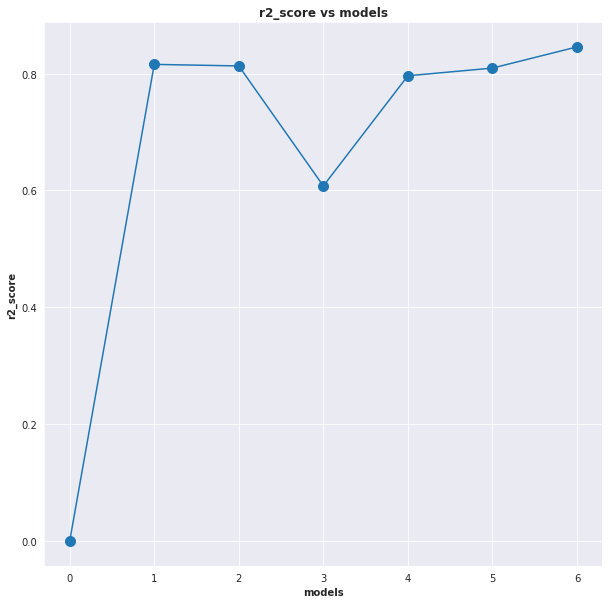

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10,10))

sns.set_style("darkgrid")
plt.plot(r2_scr,marker = 'o',markersize=10,linewidth=1.5)

plt.title("r2_score vs models",fontweight="bold")
plt.xlabel("models",fontweight="bold")
plt.ylabel("r2_score",fontweight="bold")

plt.show()


**Plot of mse of the models:**

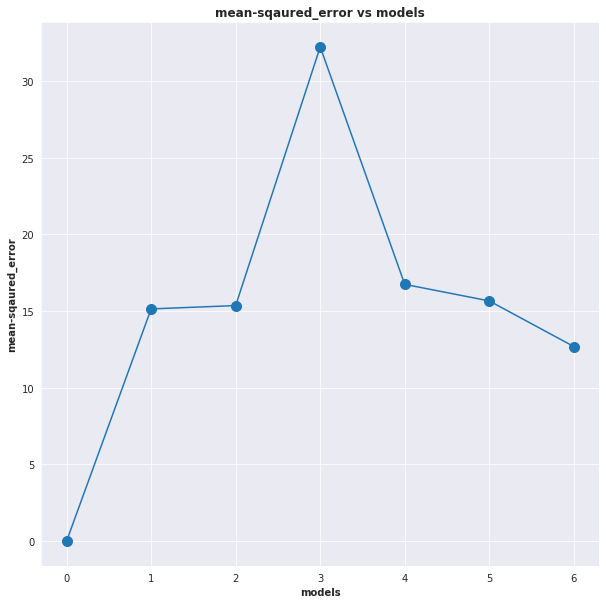

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10,10))

sns.set_style("darkgrid")
plt.plot(mse,marker = 'o',markersize=10,linewidth=1.5)

plt.title("mean-sqaured_error vs models",fontweight="bold")
plt.xlabel("models",fontweight="bold")
plt.ylabel("mean-sqaured_error",fontweight="bold")
plt.show()